In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import matplotlib 
import os
import rasterio
from rasterio.plot import show
import pickle
import geopandas as gpd

dataset_path = '/data/fast0/datasets/'
output_path = '/data/fast1/arc/rift_obs'

## Plot the rifts on imagery 

Text(0, 0.5, 'Polar Stereo Y (m)')

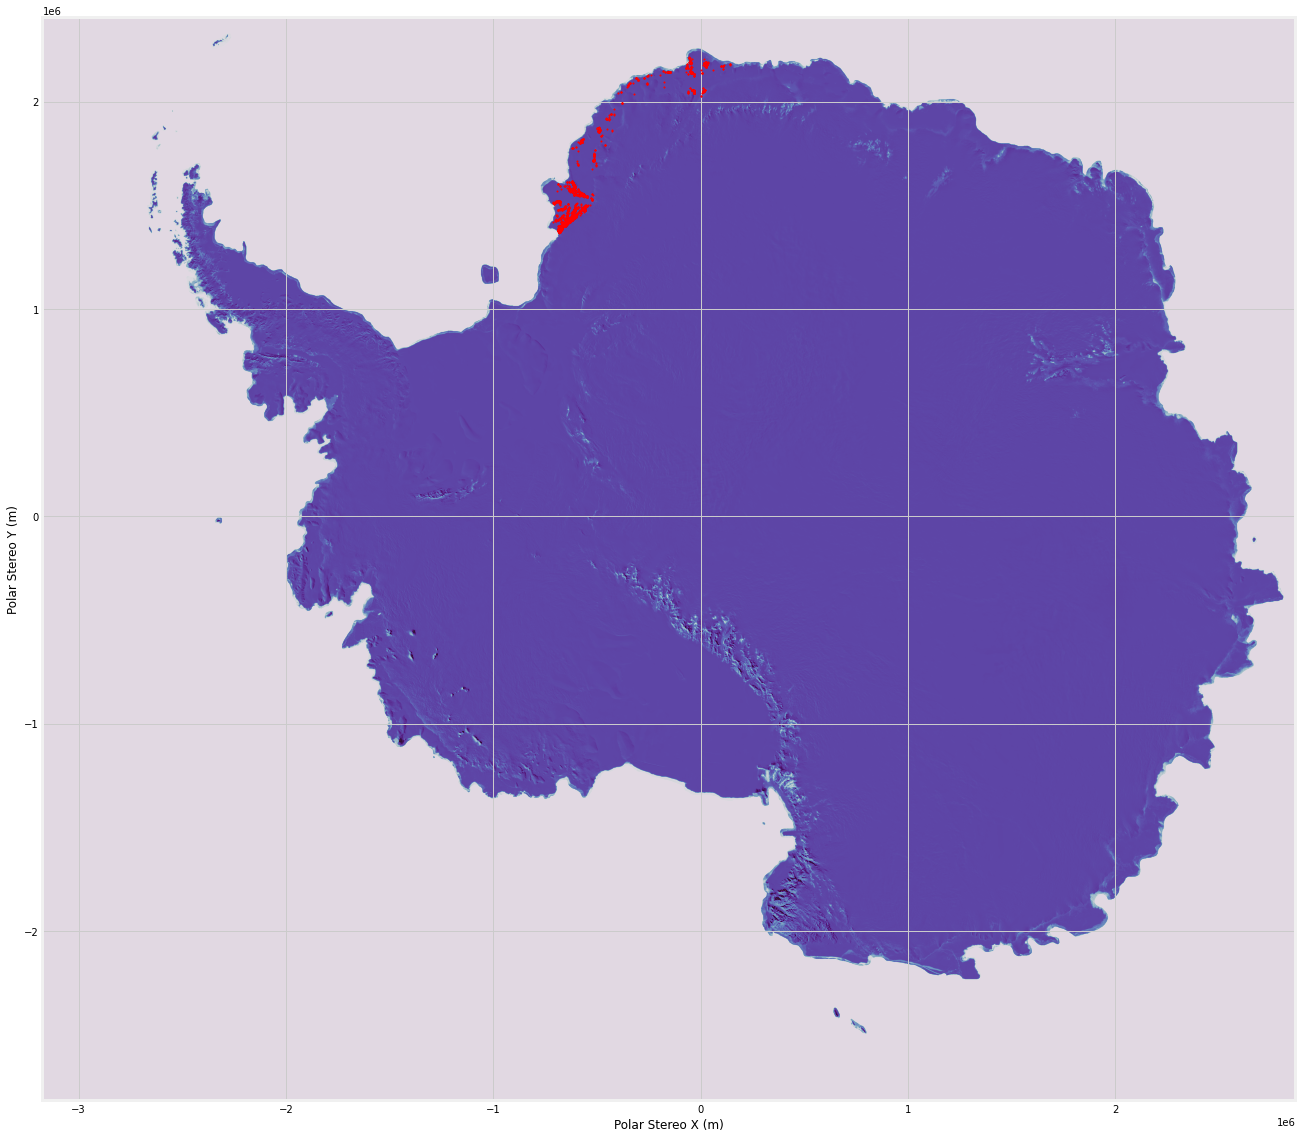

In [2]:
# image_file = 'datasets/riise_2020028_1615_modis_ch02.tif'
image_file = dataset_path + 'moa750_2014_hp1_v01.tif'

# Plot catalog over imagery
fig2,ax2 = plt.subplots(figsize=(20,20))
sat_data = rasterio.open(image_file)
show(sat_data,cmap="twilight",ax=ax2)



# for shelf_name in ['amery','ross','brunt','Fimbul','Ronne','East','Amundsen']:
# for shelf_name in ['amery','brunt','ap','fimbul']:
for shelf_name in ['brunt']:

    # Load the rift observations
    rift_obs_output_file_name = os.path.join(output_path, shelf_name + '.pkl')
    with open(rift_obs_output_file_name, 'rb') as handle:
        rift_obs = pickle.load(handle)
    ax2.scatter(rift_obs['x-centroid'] ,rift_obs['y-centroid'] ,s=2,c='r')

    
with open('rift_obs/brunt.pkl', 'rb') as handle:
    rift_obs = pickle.load(handle)    

# Make a geopanda

rift_obs = gpd.GeoDataFrame(
    rift_obs, geometry=gpd.points_from_xy(rift_obs['x-centroid'], rift_obs['y-centroid']))

plt.xlabel('Polar Stereo X (m)')
plt.ylabel('Polar Stereo Y (m)')